In [160]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.markers import MarkerStyle

In [161]:
Rayons=(np.array([3.06,3.96,4.97])/2)/100
err_Rayons = (np.array([0.94, 1.49, 1.3]))/100

L = (np.array([19.3, 20.9, 25.5]))/1000
l = (np.array([9.6, 10, 5]))/1000

S = L*l
errS = 0.5*1e-3/L*S + 0.5*1e-3/l*S
print(errS)

L0 = (np.array([96.6, 150.9, 60]))/1000

Longueur = (np.array([36, 6, 13]))/1000
dL = L - L0
errdL = 0.5*1e-3 + 0.5*1e-3
print(errdL)

epsilon = dL/L0
errEpsilon = errdL/dL*epsilon + (0.5*1e-3)/L0*epsilon
print(errEpsilon)

Young_Bas = S*epsilon
errYoungBas = errS/S*Young_Bas + errEpsilon/epsilon*Young_Bas
print(errYoungBas)
masse_vide = 66/1000
errMasse = np.array([2, 2, 4, 8, 16, 32, 64, 128])/1000            # TODO trouver lincertitude sur la masse 
print(errMasse)

Masses=np.array([0  , 100 , 200 , 400 , 800 , 1600, 3200, 6400])/1000

R =  [ np.array([7.5, 7.5 , 10.0, 10.0, 12.5, 15.0, 20  , 22.5])/1000, 
       np.array([5.0, 7.5 , 7.5 , 10.0, 12.5, 15.0, 22.5, 30.0])/1000, 
       np.array([5.0, 10.0, 10.0, 12.5, 15.0, 17.5, 22.5, 30.0])/1000]

V =  [ np.array([5.0, 5.0 , 5.0 , 7.5 , 7.5 , 10.0, 10  , 12.5])/1000, 
       np.array([2.5, 5.0 , 5.0 , 5.0 , 7.5 , 10.0, 12.5, 15.0])/1000, 
       np.array([2.5, 5.0 , 5.0 , 7.5 , 10.0, 10.0, 12.5, 15.0])/1000]

B =  [ np.array([5.0, 5.0 , 5.0 , 7.5 , 10.0, 10.0, 12.5, 15.0])/1000, 
       np.array([5.0, 5.0 , 7.5 , 7.5 , 10.0, 12.5, 12.5, 17.5])/1000,
       np.array([5.0, 5.0 , 7.5 , 7.5 , 10.0, 12.5, 15.0, 20.0])/1000]

Masses = Masses + masse_vide # TODO mesurer la masse a vide 

[1.445e-05 1.545e-05 1.525e-05]
0.001
[0.00621011 0.00377237 0.011875  ]
[-1.04123828e-05 -1.25217131e-05 -7.25468750e-06]
[0.002 0.002 0.004 0.008 0.016 0.032 0.064 0.128]


Contact de Hertz
============

# Les $\Pi$

$d_{alonge} = f(g, r, m, Y)$

$[g] = LT^{-2}$

$[r] = L$

$[m] = M$

$[Y] = ML^{-1}T^{-2}$

5 parametres 3 dimensions => T M L => 2 nombres Pi

$\Pi_1 = \frac{d_{alonge}}{r}$

$\Pi_2 = \frac{Yr^2}{gm} = \frac{Y}{gmr^{-2}}$

$\Pi_1 = A\Pi_{2}^{\alpha}$

$\log{\Pi_1} = \log{A} + \alpha \log{\Pi_2}$

# Questions 
Est il normal que on a dans nos deux pi le rayon et que ca change les deux en meme temps 

In [162]:
# d alonge cest notre mesurement 
def Pi1(d_alonge, rayon):
    return d_alonge/rayon

def Pi2(Y, m, r, g = 9.81):
    return (Y*r*r)/(g*m)

In [163]:
ToutLesSpheres = [R, V, B]
Noms = ["Rose", "Vert", "Bleu"]
YoungsGPa = np.array([0.000142, 0.001180, 0.000358]) # TODO check ca. valeurs qui vient de projet.ipynb 
YoungsMpa = 1e3*YoungsGPa 
YoungPa = YoungsGPa*1e9
markers = [ 'left', 'right', 'bottom']

err_Mg = errMasse/Masses*Masses*9.81 + 0/9.81*Masses*9.81
# print(err_Mg)
Young_err = []
# print(YoungPa)
# print(Masses)
for i in range(3): 
    Young_err.append(err_Mg/(Masses*9.81)*YoungPa[i] + errYoungBas[i]/Young_Bas[i]*YoungPa[i])
print(Young_err)

PI1 = []
PI2 = []
for i in range(len(ToutLesSpheres)):
    PI1.append(Pi1(ToutLesSpheres[i], Rayons[i]))
    PI2.append(Pi2(YoungPa[i], Masses, Rayons[i]))
#SYMBOLS = ["+", "x", "o"]
# print(PI1[0])
# print(PI1[0][0])
# print(len(PI2) == len(PI1))
# print(PI1)
# print(PI2)
# print(len(PI1[1]))
# print(len(PI2[1]))
      

[array([14275.61105474, 11683.42412521, 12107.91909758, 12410.34899205,
       12596.1373337 , 12700.07174811, 12755.18944736, 12783.59219619]), array([117820.19184122,  96279.48355353,  99806.9769859 , 102320.12681326,
       103864.00176494, 104727.68211006, 105185.7024278 , 105421.72527016]), array([46274.61443075, 39739.38259432, 40809.58822888, 41572.05232905,
       42040.44828897, 42302.48012248, 42441.43882905, 42513.04575919])]


-0.3613365173693966


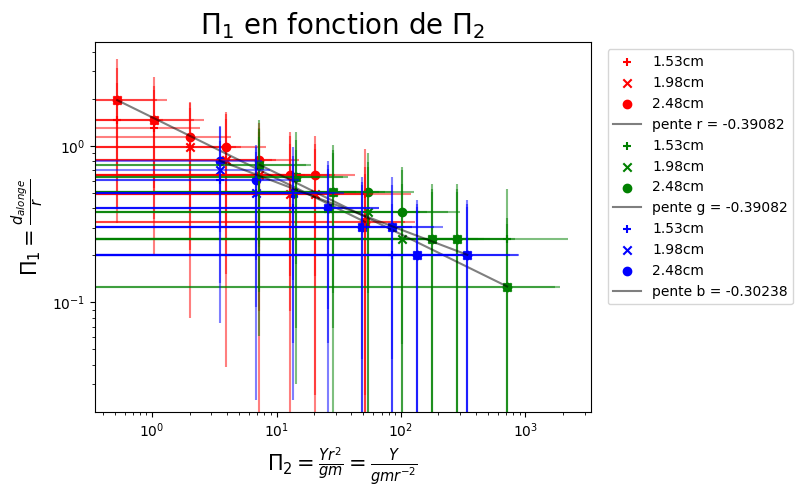

In [164]:
SYMBOLS = ["+", "x", "o"]
PI1_ERR = []
PI2_ERR = []
def TousSur1Graph(nb, alongations, Masses, Rayons, nomGraph, Youngs, AX, COLOR, pi2_err = 1.5/1000, loglog = True):
    minx =  99999999
    miny =  99999999
    maxx = -99999999
    maxy = -99999999
    for i in range(len(ToutLesSpheres)):  
        X = PI2[nb]#Pi2(Youngs, Masses, Rayons[i])
        Y = PI1[nb][i]#Pi1(alongations[i], Rayons[i])
        Pi2_err = (Young_err[nb]/YoungPa[i] + errMasse/Masses + 2*(err_Rayons[i]/Rayons[i])) * X
        PI2_ERR.append(Pi2_err)
        Pi1_err = (2.5e-3)/alongations[i]*Y + err_Rayons[i]/Rayons[i]*Y
        PI1_ERR.append(Pi1_err)
        AX.errorbar( X, Y, xerr = Pi2_err, yerr=Pi1_err, marker = None,#MarkerStyle('o', fillstyle=markers[i])
                    color = COLOR, ls = 'none', alpha = 0.5
                   )
        AX.scatter(X, Y, marker = SYMBOLS[i],  label = "{:.2f}cm".format(Rayons[i]*100), color = COLOR#, alpha = 0.5, marker = MarkerStyle("o", fillstyle=markers[i])
                  )
        for c in range(len(X)):
            if X[c] <= minx:
                minx = X[c]
                miny = Y[c]
            if X[c] >= maxx:
                maxx = X[c]
                maxy = Y[c]
    pente = (np.log(maxy) - np.log(miny))/(np.log(maxx)-np.log(minx))
    AX.plot([minx, maxx], [miny, maxy], c = "k", alpha = 0.5, label = "pente "+ COLOR +" = %.5f" %pente)
    # pas touche la mouche 
    plt.legend(bbox_to_anchor=(1.02, 1.0),loc='upper left')
    plt.title("$\Pi_1$ en fonction de $\Pi_2$", fontsize = 20)
    plt.xlabel("$\Pi_2 = \\frac{Yr^2}{gm} = \\frac{Y}{gmr^{-2}}$", fontsize = 15)
    plt.ylabel("$\Pi_1 = \\frac{d_{alonge}}{r}$", fontsize = 15)
    if loglog:
        AX.set_xscale('log')
        AX.set_yscale('log')
    return pente
    #plt.savefig("image.png")
COLORS = ["r", "g", "b"]
fig, AX = plt.subplots()
PENTES = []
for i in range(len(ToutLesSpheres)):
    PENTES.append(TousSur1Graph(i, ToutLesSpheres[i], Masses, Rayons, Noms[i], YoungPa[i], AX, COLORS[i]))
ALPHA = np.average(PENTES)
print(ALPHA)
plt.savefig("Tous.png", dpi = 500) 
plt.show()
plt.close()

1.4808278732475753


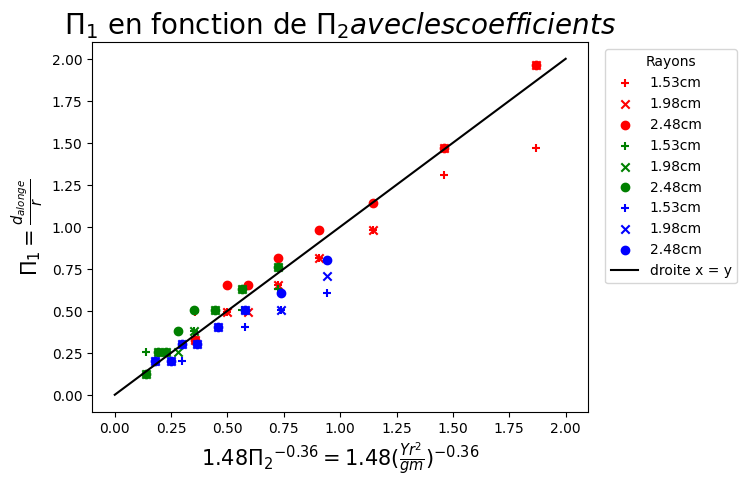

In [165]:
# def valeurs(Y, r, m, g = 9.81):
#     val = r*(((Y * r**2) / (g * m))**(ALPHA))
#     print(1.3*val)
#     return val
# valeurs(YoungPa[0], Rayons[0], Masses[5])
SYMBOLS = ["+", "x", "o"]

def graph():
    fig, ax = plt.subplots()
    moys = []
    for i in range(3):
        for j in range(3):
            moys.append(np.average(PI1[i][j]/(PI2[i]**ALPHA)))
    print(np.average(moys))
    constante = np.average(moys)
    for i in range(3):
        for j in range(3):
            ax.scatter(constante*PI2[i]**ALPHA, PI1[i][j], color = COLORS[i], marker = SYMBOLS[j],label = "{:.2f}cm".format(Rayons[j]*100))
    ax.plot([0,2],[0, 2], color = "k", label = "droite x = y")
    plt.legend(bbox_to_anchor=(1.02, 1.0),loc='upper left', title= "Rayons")
    plt.title("$\Pi_1$ en fonction de $\Pi_2 avec les coefficients$", fontsize = 20)
    plt.xlabel("${%.2f}{\Pi_2}^{%.2f}  = {%.2f}{(\\frac{Yr^2}{gm})}^{%.2f} $" %(constante,ALPHA,constante,ALPHA),fontsize = 15)#= {(\\frac{Y}{gmr^{-2})}^{%.2f}
    plt.ylabel("$\Pi_1= \\frac{d_{alonge}}{r}}$",fontsize = 15)
    plt.savefig("Ultime.png", dpi = 500)
    plt.show()
    plt.close()
graph()

In [166]:
# def Graph1FonctionDe2(nb, j, alongations, Masse, Rayon, nomGraph, Young, loglog = True): #On mets reayon fixe
#     minx =  99999999
#     miny =  99999999
#     maxx = -99999999
#     maxy = -99999999
#     X = Pi2(Young, Masse, Rayon)
#     Y = Pi1(alongations, Rayon)
#     fig, ax = plt.subplots()
           
#     ax.errorbar( X, Y, xerr = 1.5, yerr = errMasse, 
#                     marker = None,#MarkerStyle('o', fillstyle=markers[i])
#                     ls = 'none', alpha = 0.5
#                 )
#     ax.scatter(X, Y, marker = MarkerStyle("o", fillstyle=markers[j]), s= 40, label = str(Rayon)#, alpha = 0.5
#                 )
#     for c in range(len(X)):
#             if X[c] <= minx:
#                 minx = X[c]
#                 miny = Y[c]
#             if X[c] >= maxx:
#                 maxx = X[c]
#                 maxy = Y[c]
#     pente = (maxy - miny)/(maxx-minx)
#     ax.plot([minx, maxx], [miny, maxy], c = "k", alpha = 0.5, label = "pente = %.5f" %pente)
#     # pas touche la mouche 
#     plt.legend(loc='lower left')
#     plt.title(nomGraph + " Y =" + "%.3f" %YoungsMpa[nb] + "MPa")
#     plt.xlabel("$\Pi_2 = \\frac{Yr^2}{gm} = \\frac{Y}{gmr^{-2}}$")
#     plt.ylabel("$\Pi_1 = \\frac{d_{alonge}}{r}$")
#     if loglog:
#         ax.set_xscale('log')
#         ax.set_yscale('log')
#     #plt.savefig("image.png")
#     plt.show()
#     plt.close()

In [167]:
# def Graph1FonctionDe2Tous(nb, alongations, Masses, Rayons, nomGraph, Youngs, loglog = True): #On mets reayon fixe
#     fig, ax = plt.subplots()
#     minx =  99999999
#     miny =  99999999
#     maxx = -99999999
#     maxy = -99999999
#     for i in range(len(ToutLesSpheres)):  
#         X = Pi2(Youngs, Masses, Rayons[i])
#         Y = Pi1(alongations[i], Rayons[i])
#         ax.errorbar( X, Y, xerr = 1.5, yerr = 1/1000,#errMasse, 
#                         marker = None,#MarkerStyle('o', fillstyle=markers[i])
#                         ls = 'none', alpha = 0.5
#                     )
#         ax.scatter(X, Y, marker = MarkerStyle("o", fillstyle=markers[i]), s= 40, label = str(Rayons[i])#, alpha = 0.5
#                     )
#         for c in range(len(X)):
#             if X[c] <= minx:
#                 minx = X[c]
#                 miny = Y[c]
#             if X[c] >= maxx:
#                 maxx = X[c]
#                 maxy = Y[c]
#     pente = (maxy - miny)/(maxx-minx)
#     ax.plot([minx, maxx], [miny, maxy], c = "k", alpha = 0.5, label = "pente = %.5f" %pente)
#     # pas touche la mouche 
#     plt.legend(loc='lower left')
#     plt.title(nomGraph + " Y =" + "%.3f" %YoungsMpa[nb] + "MPa")
#     plt.xlabel("$\Pi_2 = \\frac{Yr^2}{gm} = \\frac{Y}{gmr^{-2}}$")
#     plt.ylabel("$\Pi_1 = \\frac{d_{alonge}}{r}$")
#     if loglog:
#         ax.set_xscale('log')
#         ax.set_yscale('log')
#     #plt.savefig("image.png")
#     plt.show()
#     plt.close()

In [168]:
# for i in range(len(ToutLesSpheres)):
#     Graph1FonctionDe2Tous(i, ToutLesSpheres[i], Masses, Rayons, Noms[i], YoungPa[i])

In [169]:
# for i in range(len(ToutLesSpheres)):
#     for j in range(len(ToutLesSpheres)):
#         Graph1FonctionDe2(i ,j, ToutLesSpheres[i][j], Masses, Rayons[j], Noms[i] + str(j), YoungPa[i])

In [170]:
# def GraphMasseDeformation(X : list, nomGraph : str, nb ,loglog = True):
#     fig, ax = plt.subplots()
#     for i in range(len(Rayons)):            
#         ax.errorbar( X[i], Masses, xerr = 1.5, yerr = errMasse, 
#                      marker = None,#MarkerStyle('o', fillstyle=markers[i])
#                      ls = 'none', alpha = 0.5
#                    )
#         ax.scatter(X[i], Masses, marker = MarkerStyle("o", fillstyle=markers[i]), s= 40, label = str(Rayons[i])#, alpha = 0.5
#                    )
#     # pas touche la mouche 
#     plt.legend(loc='upper left')
#     plt.title(nomGraph + " Y =" + "%.3f" %YoungsMpa[nb] + "MPa")
#     plt.xlabel("Deformation diametre en mm")
#     plt.ylabel("Masse en gr")
#     if loglog:
#         ax.set_xscale('log')
#         ax.set_yscale('log')
#     #plt.savefig("image.png")
#     plt.show()
#     plt.close()
    

In [171]:
# for i in range(len(ToutLesSpheres)):
#     GraphMasseDeformation(ToutLesSpheres[i], Noms[i], i, False)
# fig, ax = plt.subplots() 
# ax.errorbar(R[0], Masse, xerr = 1.5, yerr = errMasse, fmt = "o", label = Rayons[i], alpha = 0.7)
# ax.set_xscale('log')
# ax.set_yscale('log')